In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import pandas as pd

In [69]:
area_link = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/면적(2019).csv'
ar = pd.read_csv(area_link, encoding='utf-8')
ar.head()

,Unnamed: 0,시도,시도코드,면적(2019)
0,3,서울,11,6.052370e+08
1,4,부산,21,7.700734e+08
2,5,대구,22,8.835173e+08
3,6,인천,23,1.063258e+09
4,7,광주,24,5.011363e+08


In [70]:
people_link = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/인구대비데이터정리.csv'
pp = pd.read_csv(people_link)
pp.head()

,Unnamed: 0,시도코드,시도명,십만명당 회피가능사망율,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수
0,0,11,서울특별시,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859
1,1,21,부산광역시,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495
2,2,22,대구광역시,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563
3,3,23,인천광역시,65.645136,2952237,2957026,24081,5071,11639,8.143655,1.714899,3.936049,34176,11.6,1677,3,16,62,1573,0.567124,0.006425
4,4,24,광주광역시,60.682137,1489730,1456468,17835,3658,8949,12.245377,2.511555,6.144316,40206,27.6,1075,2,21,80,948,0.738087,0.015792


In [121]:
df = pd.merge(ar, pp, on='시도코드')
df = df.drop(['Unnamed: 0_x', '시도코드', 'Unnamed: 0_y', '시도명'], axis=1)
df.head()

,시도,면적(2019),십만명당 회피가능사망율,총 인구,주민등록인구,의료인수합계,의사,간호사,천명당 의료인수,천명당 의사수,천명당 간호사수,병상수합계,천명당 병상수,요양기관합계,상급종합병원,종합병원,병원,의원,천명당 요양기관수,천명당 상급+종합병원수
0,서울,6.052370e+08,66.496942,9639541,9729107,114861,30359,52727,11.805914,3.120430,5.419511,88059,9.1,8924,13,44,228,8628,0.917248,0.005859
1,부산,7.700734e+08,86.370176,3372692,3413841,37028,8008,18514,10.846434,2.345745,5.423217,69862,20.5,2576,4,25,142,2384,0.754575,0.008495
2,대구,8.835173e+08,61.359540,2429940,2438031,26087,5908,12557,10.700028,2.423267,5.150468,38132,15.6,1950,5,11,109,1803,0.799826,0.006563
3,인천,1.063258e+09,65.645136,2952237,2957026,24081,5071,11639,8.143655,1.714899,3.936049,34176,11.6,1677,3,16,62,1573,0.567124,0.006425
4,광주,5.011363e+08,60.682137,1489730,1456468,17835,3658,8949,12.245377,2.511555,6.144316,40206,27.6,1075,2,21,80,948,0.738087,0.015792


In [124]:
df1 =  df[['시도', '십만명당 회피가능사망율', '면적(2019)', '천명당 상급+종합병원수']]
df1['면적당병원수'] = (df['상급종합병원']+df['종합병원']+df['병원']) / df1['면적(2019)']
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,시도,십만명당 회피가능사망율,면적(2019),천명당 상급+종합병원수,면적당병원수
0,서울,66.496942,6.052370e+08,0.005859,4.708899e-07
1,부산,86.370176,7.700734e+08,0.008495,2.220568e-07
2,대구,61.359540,8.835173e+08,0.006563,1.414800e-07
3,인천,65.645136,1.063258e+09,0.006425,7.618096e-08
4,광주,60.682137,5.011363e+08,0.015792,2.055329e-07
5,대전,55.576349,5.396265e+08,0.006780,1.130411e-07
6,울산,52.723985,1.062039e+09,0.006969,4.802084e-08
7,경기,37.854591,1.019251e+10,0.002936,9.811122e-11
8,세종특별자치시,59.492215,4.649497e+08,0.004834,7.334127e-07
9,강원,120.779382,1.682828e+10,0.009731,3.565427e-09


In [43]:
import matplotlib.pyplot as plt

In [125]:
df1.corr(method='pearson')

,십만명당 회피가능사망율,면적(2019),천명당 상급+종합병원수,면적당병원수
십만명당 회피가능사망율,1.000000,0.595427,0.466354,-0.367221
면적(2019),0.595427,1.000000,0.061136,-0.524281
천명당 상급+종합병원수,0.466354,0.061136,1.000000,-0.178312
면적당병원수,-0.367221,-0.524281,-0.178312,1.000000


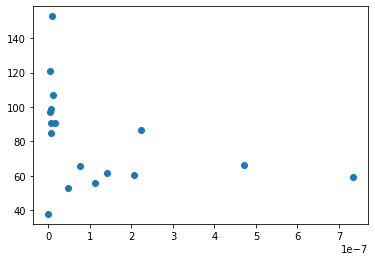

In [128]:
plt.scatter(df1['면적당병원수'], df1['십만명당 회피가능사망율'])
plt.show()